**Please upvote my notebook if You like it!**

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv
/kaggle/input/lassocv-submission/submission (2).csv
/kaggle/input/playground-series-s3e2/sample_submission.csv
/kaggle/input/playground-series-s3e2/train.csv
/kaggle/input/playground-series-s3e2/test.csv


**Downloading data**
+ adding data from "stroke prediction dataset"

In [2]:
train_df = pd.read_csv('/kaggle/input/playground-series-s3e2/train.csv')
test_df = pd.read_csv('/kaggle/input/playground-series-s3e2/test.csv')
submission = pd.read_csv('/kaggle/input/playground-series-s3e2/sample_submission.csv')
addition_data = pd.read_csv('/kaggle/input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv')

In [3]:
train_df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,Male,28.0,0,0,Yes,Private,Urban,79.53,31.1,never smoked,0
1,1,Male,33.0,0,0,Yes,Private,Rural,78.44,23.9,formerly smoked,0
2,2,Female,42.0,0,0,Yes,Private,Rural,103.00,40.3,Unknown,0
3,3,Male,56.0,0,0,Yes,Private,Urban,64.87,28.8,never smoked,0
4,4,Female,24.0,0,0,No,Private,Rural,73.36,28.8,never smoked,0
...,...,...,...,...,...,...,...,...,...,...,...,...
15299,15299,Female,22.0,0,0,No,Govt_job,Urban,72.63,19.5,never smoked,0
15300,15300,Female,46.0,1,0,Yes,Private,Urban,101.19,32.1,never smoked,0
15301,15301,Female,75.0,0,0,Yes,Self-employed,Urban,87.69,26.2,never smoked,0
15302,15302,Male,46.0,0,0,Yes,Private,Rural,101.13,22.5,Unknown,0


In [4]:
addition_data = addition_data[addition_data['stroke']==1]
addition_data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
244,17739,Male,57.0,0,0,Yes,Private,Rural,84.96,36.7,Unknown,1
245,49669,Female,14.0,0,0,No,children,Rural,57.93,30.9,Unknown,1
246,27153,Female,75.0,0,0,Yes,Self-employed,Rural,78.80,29.3,formerly smoked,1
247,34060,Male,71.0,1,0,Yes,Self-employed,Rural,87.80,NaN,Unknown,1


There is missing data in addition dataset

In [5]:
addition_data.isna().any()

id                   False
gender               False
age                  False
hypertension         False
heart_disease        False
ever_married         False
work_type            False
Residence_type       False
avg_glucose_level    False
bmi                   True
smoking_status       False
stroke               False
dtype: bool

In [6]:
from sklearn.neighbors import KNeighborsRegressor

def knn_impute(df, na_target):
    df = df.copy()
    
    numeric_df = df.select_dtypes(np.number)
    non_na_columns = numeric_df.loc[: ,numeric_df.isna().sum() == 0].columns
    
    y_train = numeric_df.loc[numeric_df[na_target].isna() == False, na_target]
    X_train = numeric_df.loc[numeric_df[na_target].isna() == False, non_na_columns]
    X_test = numeric_df.loc[numeric_df[na_target].isna() == True, non_na_columns]
    
    knn = KNeighborsRegressor()
    knn.fit(X_train, y_train)
    
    y_pred = knn.predict(X_test)
    
    df.loc[df[na_target].isna() == True, na_target] = y_pred
    
    return df

na_cols = [col for col in addition_data.columns if addition_data[col].isnull().sum()!=0]

for col in na_cols:  
    addition_data = knn_impute(addition_data, col)

In [7]:
addition_data.isna().any()

id                   False
gender               False
age                  False
hypertension         False
heart_disease        False
ever_married         False
work_type            False
Residence_type       False
avg_glucose_level    False
bmi                  False
smoking_status       False
stroke               False
dtype: bool

In [8]:
# addition_data.bmi = addition_data.bmi.fillna(np.mean(addition_data.bmi))

In [9]:
# train_df['generated'] = 1
# test_df['generated'] = 1
# addition_data['generated'] = 0
train_df = pd.concat([train_df, addition_data],axis=0, ignore_index=True)

In [10]:
train_df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,Male,28.0,0,0,Yes,Private,Urban,79.53,31.10,never smoked,0
1,1,Male,33.0,0,0,Yes,Private,Rural,78.44,23.90,formerly smoked,0
2,2,Female,42.0,0,0,Yes,Private,Rural,103.00,40.30,Unknown,0
3,3,Male,56.0,0,0,Yes,Private,Urban,64.87,28.80,never smoked,0
4,4,Female,24.0,0,0,No,Private,Rural,73.36,28.80,never smoked,0
...,...,...,...,...,...,...,...,...,...,...,...,...
15548,17739,Male,57.0,0,0,Yes,Private,Rural,84.96,36.70,Unknown,1
15549,49669,Female,14.0,0,0,No,children,Rural,57.93,30.90,Unknown,1
15550,27153,Female,75.0,0,0,Yes,Self-employed,Rural,78.80,29.30,formerly smoked,1
15551,34060,Male,71.0,1,0,Yes,Self-employed,Rural,87.80,25.28,Unknown,1


<AxesSubplot:>

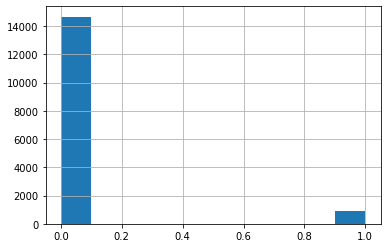

In [11]:
train_df['stroke'].hist()

No missing data in our dataset

In [12]:
train_df.isna().any()

id                   False
gender               False
age                  False
hypertension         False
heart_disease        False
ever_married         False
work_type            False
Residence_type       False
avg_glucose_level    False
bmi                  False
smoking_status       False
stroke               False
dtype: bool

In [13]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15553 entries, 0 to 15552
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 15553 non-null  int64  
 1   gender             15553 non-null  object 
 2   age                15553 non-null  float64
 3   hypertension       15553 non-null  int64  
 4   heart_disease      15553 non-null  int64  
 5   ever_married       15553 non-null  object 
 6   work_type          15553 non-null  object 
 7   Residence_type     15553 non-null  object 
 8   avg_glucose_level  15553 non-null  float64
 9   bmi                15553 non-null  float64
 10  smoking_status     15553 non-null  object 
 11  stroke             15553 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 1.4+ MB


In [14]:
df = pd.concat([train_df, test_df], axis=0)
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,Male,28.0,0,0,Yes,Private,Urban,79.53,31.1,never smoked,0.0
1,1,Male,33.0,0,0,Yes,Private,Rural,78.44,23.9,formerly smoked,0.0
2,2,Female,42.0,0,0,Yes,Private,Rural,103.00,40.3,Unknown,0.0
3,3,Male,56.0,0,0,Yes,Private,Urban,64.87,28.8,never smoked,0.0
4,4,Female,24.0,0,0,No,Private,Rural,73.36,28.8,never smoked,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
10199,25503,Female,27.0,0,0,No,Private,Urban,75.77,17.6,never smoked,NaN
10200,25504,Male,49.0,0,0,Yes,Private,Urban,102.91,26.7,Unknown,NaN
10201,25505,Female,3.0,0,0,No,children,Rural,104.04,18.3,Unknown,NaN
10202,25506,Male,31.0,0,0,Yes,Private,Urban,82.41,28.7,never smoked,NaN


In [15]:
# df['morbid'] = np.where(df.bmi>40,1,0)
# df['obese'] = np.where(df.bmi>30,1,0)

In [16]:
# def feature_risk_factors(df):
#     df["risk_factors"] = df[[
#         "avg_glucose_level", "age", "bmi", 
#         "hypertension", "heart_disease", 
#         "smoking_status"
#     ]].apply(
#         lambda x: \
#         0 + (1 if x.avg_glucose_level > 99 else 0) + \
#         (1 if x.age > 45 else 0) + (1 if x.bmi > 24.99 else 0) + \
#         (1 if x.hypertension == 1 else 0) + \
#         (1 if x.heart_disease == 1 else 0) + \
#         (1 if x.smoking_status in ["formerly smoked", "smokes"] else 0),
#         axis=1
#     )
#     return df

# feature_risk_factors(df)

In [17]:
df = pd.get_dummies(df)
df = df.drop('id', axis=1)

In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

num_cols = ['age', 'avg_glucose_level', 'bmi']

y = df['stroke']
df = df.drop('stroke', axis=1)

df[df.columns] = scaler.fit_transform(df[df.columns])

# df = pd.DataFrame(scaler.fit_transform(df), columns = df.columns)

In [19]:
df

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,-0.648380,-0.235369,-0.157827,-0.375926,0.433233,-1.272679,1.272888,-0.008812,-0.676024,0.676024,...,-0.049121,0.750662,-0.38686,-0.384003,-0.993923,0.993923,-0.644919,-0.428205,1.195020,-0.402563
1,-0.414668,-0.235369,-0.157827,-0.416931,-0.637614,-1.272679,1.272888,-0.008812,-0.676024,0.676024,...,-0.049121,0.750662,-0.38686,-0.384003,1.006114,-1.006114,-0.644919,2.335331,-0.836806,-0.402563
2,0.006014,-0.235369,-0.157827,0.506992,1.801537,0.785744,-0.785615,-0.008812,-0.676024,0.676024,...,-0.049121,0.750662,-0.38686,-0.384003,1.006114,-1.006114,1.550583,-0.428205,-0.836806,-0.402563
3,0.660409,-0.235369,-0.157827,-0.927420,0.091157,-1.272679,1.272888,-0.008812,-0.676024,0.676024,...,-0.049121,0.750662,-0.38686,-0.384003,-0.993923,0.993923,-0.644919,-0.428205,1.195020,-0.402563
4,-0.835350,-0.235369,-0.157827,-0.608035,0.091157,0.785744,-0.785615,-0.008812,1.479237,-1.479237,...,-0.049121,0.750662,-0.38686,-0.384003,1.006114,-1.006114,-0.644919,-0.428205,1.195020,-0.402563
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10199,-0.695123,-0.235369,-0.157827,-0.517373,-1.574605,0.785744,-0.785615,-0.008812,1.479237,-1.479237,...,-0.049121,0.750662,-0.38686,-0.384003,-0.993923,0.993923,-0.644919,-0.428205,1.195020,-0.402563
10200,0.333211,-0.235369,-0.157827,0.503606,-0.221174,-1.272679,1.272888,-0.008812,-0.676024,0.676024,...,-0.049121,0.750662,-0.38686,-0.384003,-0.993923,0.993923,1.550583,-0.428205,-0.836806,-0.402563
10201,-1.816941,-0.235369,-0.157827,0.546115,-1.470495,0.785744,-0.785615,-0.008812,1.479237,-1.479237,...,-0.049121,-1.332157,-0.38686,2.604145,1.006114,-1.006114,1.550583,-0.428205,-0.836806,-0.402563
10202,-0.508153,-0.235369,-0.157827,-0.267583,0.076284,-1.272679,1.272888,-0.008812,-0.676024,0.676024,...,-0.049121,0.750662,-0.38686,-0.384003,-0.993923,0.993923,-0.644919,-0.428205,1.195020,-0.402563


In [20]:
train_df = df.iloc[:-len(test_df),:]
train_df['stroke'] = y[:-len(test_df)]
test_df = df.iloc[-len(test_df):,:].reset_index(drop=True)

X = train_df.drop('stroke', axis=1)
y = train_df.stroke
X_test = test_df

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [21]:
# y = y * 2

In [22]:
test_df

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,0.707151,-0.235369,-0.157827,-0.262693,0.775309,0.785744,-0.785615,-0.008812,-0.676024,0.676024,...,-0.049121,0.750662,-0.38686,-0.384003,1.006114,-1.006114,1.550583,-0.428205,-0.836806,-0.402563
1,1.314803,4.248651,-0.157827,-0.656940,0.046538,-1.272679,1.272888,-0.008812,-0.676024,0.676024,...,-0.049121,0.750662,-0.38686,-0.384003,-0.993923,0.993923,1.550583,-0.428205,-0.836806,-0.402563
2,-1.723456,-0.235369,-0.157827,0.534077,-1.292020,0.785744,-0.785615,-0.008812,1.479237,-1.479237,...,-0.049121,-1.332157,-0.38686,2.604145,-0.993923,0.993923,1.550583,-0.428205,-0.836806,-0.402563
3,0.660409,-0.235369,-0.157827,-0.763025,1.965138,0.785744,-0.785615,-0.008812,-0.676024,0.676024,...,-0.049121,-1.332157,-0.38686,-0.384003,-0.993923,0.993923,-0.644919,-0.428205,-0.836806,2.484081
4,-0.461410,-0.235369,-0.157827,0.813586,0.284504,-1.272679,1.272888,-0.008812,-0.676024,0.676024,...,-0.049121,0.750662,-0.38686,-0.384003,1.006114,-1.006114,-0.644919,-0.428205,-0.836806,2.484081
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10199,-0.695123,-0.235369,-0.157827,-0.517373,-1.574605,0.785744,-0.785615,-0.008812,1.479237,-1.479237,...,-0.049121,0.750662,-0.38686,-0.384003,-0.993923,0.993923,-0.644919,-0.428205,1.195020,-0.402563
10200,0.333211,-0.235369,-0.157827,0.503606,-0.221174,-1.272679,1.272888,-0.008812,-0.676024,0.676024,...,-0.049121,0.750662,-0.38686,-0.384003,-0.993923,0.993923,1.550583,-0.428205,-0.836806,-0.402563
10201,-1.816941,-0.235369,-0.157827,0.546115,-1.470495,0.785744,-0.785615,-0.008812,1.479237,-1.479237,...,-0.049121,-1.332157,-0.38686,2.604145,1.006114,-1.006114,1.550583,-0.428205,-0.836806,-0.402563
10202,-0.508153,-0.235369,-0.157827,-0.267583,0.076284,-1.272679,1.272888,-0.008812,-0.676024,0.676024,...,-0.049121,0.750662,-0.38686,-0.384003,-0.993923,0.993923,-0.644919,-0.428205,1.195020,-0.402563


I am using my ensemble model from previous competition

**CatBoost model**

In [23]:
import catboost
from sklearn.model_selection import KFold, StratifiedKFold, RepeatedStratifiedKFold
from sklearn.metrics import roc_auc_score

n_folds = 11 #12

MAX_ITER = 15000
PATIENCE = 1000
DISPLAY_FREQ = 100

eval_predsCB = []
predsCB = []

# k_fold = StratifiedKFold(n_splits=n_folds, random_state=42, shuffle=True)
k_fold = RepeatedStratifiedKFold(n_splits=n_folds, n_repeats=20, random_state=42) # 20

MODEL_PARAMS = {
                'random_seed': 1234,             
                'iterations': MAX_ITER,
                'early_stopping_rounds': PATIENCE,
                'use_best_model': True,
                'eval_metric': 'AUC',
#                 'eval_metric': 'RMSE',
                'verbose': 1000,
    
                 'depth': 3,
                 'learning_rate': 0.01,
                 'rsm': 0.5,
                 'subsample': 0.931,
                 'l2_leaf_reg': 69,
                 'min_data_in_leaf': 20,
                 'random_strength': 0.175,
               }


for train_index, test_index in k_fold.split(X, y):
    X_train, X_valid = X.iloc[train_index], X.iloc[test_index]
    y_train, y_valid = y.iloc[train_index], y.iloc[test_index]
    
#     model = catboost.CatBoostClassifier(**MODEL_PARAMS)
    model = catboost.CatBoostRegressor(**MODEL_PARAMS)
    
    model.fit(X=X_train, y=y_train,
          eval_set=[(X_valid, y_valid)],
          early_stopping_rounds = PATIENCE,
#           metric_period = DISPLAY_FREQ
         )
    predsCB.append(model.predict(X_test))
    #     eval_predsCB.append(model.predict(X))


0:	test: 0.8059864	best: 0.8059864 (0)	total: 57.9ms	remaining: 14m 28s
1000:	test: 0.8879974	best: 0.8880011 (998)	total: 2.18s	remaining: 30.6s
2000:	test: 0.8876729	best: 0.8882936 (1461)	total: 4.11s	remaining: 26.7s
Stopped by overfitting detector  (1000 iterations wait)

bestTest = 0.8882935581
bestIteration = 1461

Shrink model to first 1462 iterations.
0:	test: 0.8159182	best: 0.8159182 (0)	total: 1.92ms	remaining: 28.8s
1000:	test: 0.8893454	best: 0.8901459 (108)	total: 1.74s	remaining: 24.3s
Stopped by overfitting detector  (1000 iterations wait)

bestTest = 0.890145887
bestIteration = 108

Shrink model to first 109 iterations.


**XGBoost model**

In [24]:
from xgboost import XGBClassifier, XGBRegressor

# n_folds = 20
k_fold = RepeatedStratifiedKFold(n_splits=n_folds, n_repeats=20, random_state=42) # 20

eval_predsXB = []
predsXB = []

PATIENCE = 200

MODEL_PARAMS = {       'n_estimators': 1000, #1000, 5000
#                        'learning_rate': 0.05,
                       'max_depth': 4, # 3
                       'colsample_bytree': 0.9, # 0.95
                       'subsample': 1,
                       'reg_lambda': 20,
                       'eval_metric': 'auc',
#                        'eval_metric': 'rmse',
                       'early_stopping_rounds': PATIENCE,
#                        'tree_method': 'gpu_hist',
                       'seed': 1
}

for train_index, test_index in k_fold.split(X, y):
    X_train, X_valid = X.iloc[train_index], X.iloc[test_index]
    y_train, y_valid = y.iloc[train_index], y.iloc[test_index]
    
#     model = XGBClassifier(**MODEL_PARAMS)
    model = XGBRegressor(**MODEL_PARAMS)
    
    model.fit(X=X_train, y=y_train,
          eval_set=[(X_valid, y_valid)],
#           early_stopping_rounds = PATIENCE,
          verbose = 100
         )
    predsXB.append(model.predict(X_test))
#     eval_predsXB.append(model.predict(X))


[0]	validation_0-auc:0.85401
[100]	validation_0-auc:0.84280
[200]	validation_0-auc:0.82379
[207]	validation_0-auc:0.82474
[0]	validation_0-auc:0.79479
[100]	validation_0-auc:0.86671
[200]	validation_0-auc:0.85122
[210]	validation_0-auc:0.85047


**LGBM model**

In [25]:
import lightgbm as lgbm
from lightgbm.sklearn import LGBMClassifier, LGBMRegressor

# n_folds = 20
k_fold = RepeatedStratifiedKFold(n_splits=n_folds, n_repeats=20, random_state=42) # 20

eval_predsLB = []
predsLB = []

MODEL_PARAMS = {
                       'learning_rate': 0.01,
                       'max_depth': 9,
                       'num_leaves': 90,
                       'colsample_bytree': 0.8,
                       'subsample': 0.9,
                       'subsample_freq': 5,
                       'min_child_samples': 36,
                       'reg_lambda': 28,
                       'n_estimators': 20000,
                       'metric': 'auc',
#                        'metric': 'rmse',
                       'random_state': 1
}

callbacks = [lgbm.early_stopping(30, verbose=1), lgbm.log_evaluation(period=0)]

for train_index, test_index in k_fold.split(X, y):
    X_train, X_valid = X.iloc[train_index], X.iloc[test_index]
    y_train, y_valid = y.iloc[train_index], y.iloc[test_index]
    
#     model = lgbm.LGBMClassifier(**MODEL_PARAMS)
    model = lgbm.LGBMRegressor(**MODEL_PARAMS)
    
    model.fit(X=X_train, y=y_train,
          eval_set=[(X_valid, y_valid)],
#           early_stopping_rounds = PATIENCE,
          callbacks=callbacks
         )
    predsLB.append(model.predict(X_test))
#     eval_predsLB.append(model.predict(X))

Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[19]	valid_0's auc: 0.881014
Early stopping, best iteration is:
[30]	valid_0's auc: 0.887632


**Lasso regression**

In [26]:
from sklearn.linear_model import LassoCV

# n_folds = 20
k_fold = RepeatedStratifiedKFold(n_splits=n_folds, n_repeats=20, random_state=42) # 20

eval_predsLR = []
predsLR = []

MODEL_PARAMS = {
                       'precompute': "auto",
                       'fit_intercept': True,
                       'normalize': False,
                       'max_iter': 1000,
                       'verbose': False,
                       'eps': 1e-04,
                       'cv': 5,
                       'n_alphas': 1000,
                       'n_jobs': 8,
}

callbacks = [lgbm.early_stopping(30, verbose=1), lgbm.log_evaluation(period=0)]

for train_index, test_index in k_fold.split(X, y):
    X_train, X_valid = X.iloc[train_index], X.iloc[test_index]
    y_train, y_valid = y.iloc[train_index], y.iloc[test_index]
    
#     model = lgbm.LGBMClassifier(**MODEL_PARAMS)
    model = LassoCV(**MODEL_PARAMS)
    
    model.fit(X=X_train, y=y_train,
#           eval_set=[(X_valid, y_valid)],
#           early_stopping_rounds = PATIENCE,
#           callbacks=callbacks
         )
    predsLR.append(model.predict(X_test))
#     eval_predsLB.append(model.predict(X))

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_base.py:155: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.465e+00, tolerance: 4.151e-02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_base.py:155: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default va

**Keras NN**
from amazing notebook https://www.kaggle.com/code/kirillka95/ps-s3e02-keras-nn-kfold-pub

In [27]:
from tensorflow import keras
import tensorflow_addons as tfa
from tensorflow.keras import layers

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, Input, Lambda, Concatenate, Add, BatchNormalization, LeakyReLU

def my_model():
    x_input = Input(shape=(X.shape[-1]), name='input')
    x1 = Dense(256, activation='relu')(x_input)
    d1 = Dropout(0.1)(x1)
    x2 = Dense(128, activation='relu')(d1)
    d2 = Dropout(0.1)(x2)
    x3 = Dense(64, activation='relu')(d2)
    d3 = Dropout(0.1)(x3)
    output = Dense(1, activation='sigmoid', name='output')(d3)
    
    model = Model(x_input, output, name='nn_model')
    return model


VERBOSE = False
BATCH_SIZE = 64
predictions, scores = [], []

lr = keras.callbacks.ReduceLROnPlateau(monitor="val_auc", 
                                       mode='max', 
                                       patience=3, 
                                       factor=0.1, 
                                       min_lr=1e-6, 
                                       min_delta=0.0001)

es = keras.callbacks.EarlyStopping(monitor="val_auc", 
                                   mode='max', 
                                   patience=7, 
                                   min_delta=0.0001, 
                                   restore_best_weights = True)

# k_fold = StratifiedKFold(n_splits=n_folds, random_state=42, shuffle=True)
k_fold = RepeatedStratifiedKFold(n_splits=n_folds, n_repeats=5, random_state=42) # 5

eval_predsNN = []
predsNN = []


for train_index, test_index in k_fold.split(X, y):
    X_train, X_valid = X.iloc[train_index], X.iloc[test_index]
    y_train, y_valid = y.iloc[train_index], y.iloc[test_index]
    
    model = my_model()
    model.compile(optimizer='adam', 
                  loss=tfa.losses.SigmoidFocalCrossEntropy(alpha=0.8, gamma=2), # alpha=0.8, gamma=2
                  metrics='AUC')
        
    model.fit(X_train, y_train, 
              validation_data=(X_valid, y_valid), 
              epochs=500,
              verbose=VERBOSE,
              batch_size=BATCH_SIZE, 
              class_weight={0: 1, 1: 10},
              callbacks=[lr, es])
    
    predsNN.append(model.predict(X_test))

2023-01-16 07:31:09.608327: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.
2023-01-16 07:31:10.014915: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


LassoCV preds from amazinf notebook https://www.kaggle.com/code/tilii7/modeling-stroke-dataset-with-lasso-regression

In [28]:
lasso_preds = pd.read_csv('/kaggle/input/lassocv-submission/submission (2).csv')
predLS = lasso_preds['stroke']

In [29]:
def normalizing_predictions(model_predictions):
    return (model_predictions - np.min(model_predictions)) / (np.max(model_predictions) - np.min(model_predictions))

In [30]:
a = 0.08  #0.15 < 0.05 < 0.08 > 0.09 > 0.1 > 0.11 > 0.125
b = 0.08  #0.1 < 0.05 < 0.08 > 0.09 > 0.1 > 0.11 > 0.125
c = 0.08  #0.15 < 0.05 < 0.08 > 0.09 > 0.1 > 0.11 > 0.125
d = 0.08  #0 < 0.05 < 0.08 > 0.09 > 0.1 > 0.11 > 0.125
e = 0.24    #0.2 < 0.3 < 0.24 > 0.22 > 0.2 > 0.2 > 0.2
f = 0.44    #0.4 < 0.5 < 0.44 > 0.42 > 0.4 > 0.36 > 0.3
predCB = np.average(np.array(predsCB),axis=0).clip(0,1)
predXB = np.average(np.array(predsXB),axis=0).clip(0,1)
predLB = np.average(np.array(predsLB),axis=0).clip(0,1)
predLR = np.average(np.array(predsLR),axis=0).clip(0,1)
predNN = np.average(np.array(predsNN),axis=0).clip(0,1)

# predCB = np.average(np.array(predsCB),axis=0)
# predXB = np.average(np.array(predsXB),axis=0)
# predLB = np.average(np.array(predsLB),axis=0)
# predLR = np.average(np.array(predsLR),axis=0)
# predNN = np.average(np.array(predsNN),axis=0).clip(0,1)

# predCB = normalizing_predictions(predCB)
# predXB = normalizing_predictions(predXB)
# predLB = normalizing_predictions(predLB)
# predLR = normalizing_predictions(predLR)
# predNN = normalizing_predictions(predNN)

predNN = pd.Series(*predNN.T)
predNN = np.array(predNN)
pred = predCB * a + predXB * b + predLB * c + predLR * d + predNN * e + predLS * f

<AxesSubplot:>

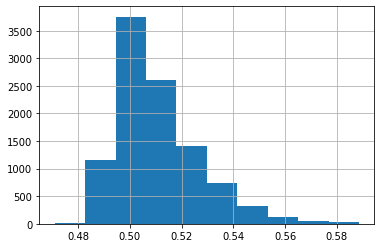

In [31]:
predLS.hist()

<AxesSubplot:>

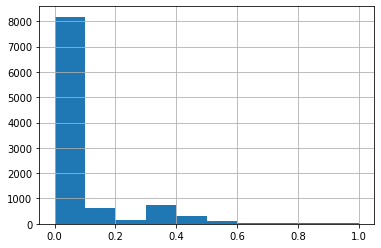

In [32]:
pd.Series(predCB).hist()

<AxesSubplot:>

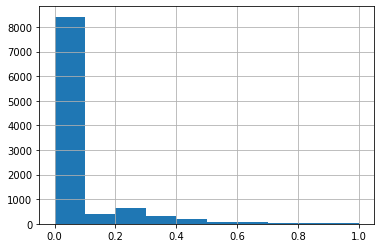

In [33]:
pd.Series(predXB).hist()

<AxesSubplot:>

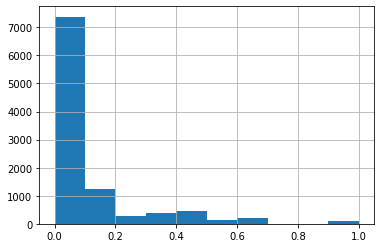

In [34]:
pd.Series(predLB).hist()

<AxesSubplot:>

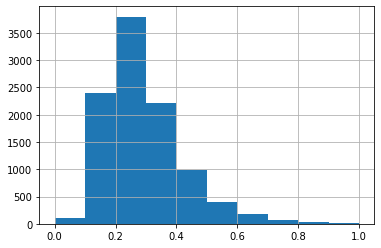

In [35]:
pd.Series(predLR).hist()

<AxesSubplot:>

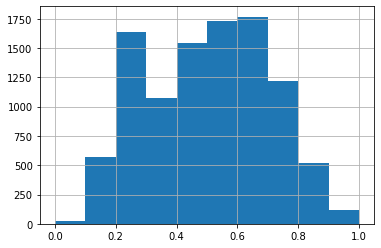

In [36]:
pd.Series(predNN).hist()

In [37]:
pred

0        0.429005
1        0.588387
2        0.303991
3        0.448051
4        0.373109
           ...   
10199    0.282303
10200    0.395656
10201    0.297771
10202    0.312489
10203    0.284601
Name: stroke, Length: 10204, dtype: float64

<AxesSubplot:>

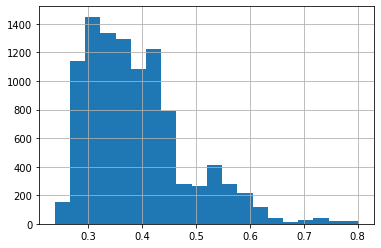

In [38]:
pd.Series(pred).hist(bins=20)

**Making submission**

In [39]:
submission['stroke'] = pred
submission

,id,stroke
0,15304,0.429005
1,15305,0.588387
2,15306,0.303991
3,15307,0.448051
4,15308,0.373109
...,...,...
10199,25503,0.282303
10200,25504,0.395656
10201,25505,0.297771
10202,25506,0.312489


In [40]:
submission.to_csv('submission.csv', index=False)